# GPR

In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor                 
from sklearn.gaussian_process.kernels import RBF,RationalQuadratic
from sklearn.gaussian_process.kernels import ExpSineSquared,Matern
from sklearn.gaussian_process.kernels import WhiteKernel, ConstantKernel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.gaussian_process.kernels import (RationalQuadratic,Exponentiation)
from sklearn.gaussian_process.kernels import CompoundKernel
import matplotlib.pyplot as plt
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer
from scipy.special import logit, expit


In [7]:
Data.columns

Index(['Point', 'A2OFRC', 'B2OFRC', 'BELTLL1', 'DABPRES', 'DABRAD', 'DUR',
       'DV', 'EV1', 'EV2', 'EV3', 'FTRIGG', 'IP2OFRC', 'KNEEFRC', 'PDOF_H',
       'PTFORCE', 'RIMFRC', 'S2OFRC', 'SLIPFRC', 'STWANGLE', 'STWCOMP',
       'STWTRANS', 'YAWSF', 'Risk(45yrs|2ribfx)(%)', 'LOGIT(risk)', 'L1', 'L2',
       'L3', 'L4', 'L5', 'L6', 'L7', 'L8', 'L9', 'L10', 'L11', 'L12', 'R1',
       'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12'],
      dtype='object')

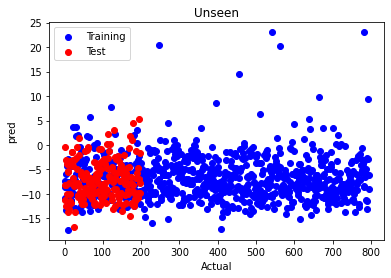

C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ypyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


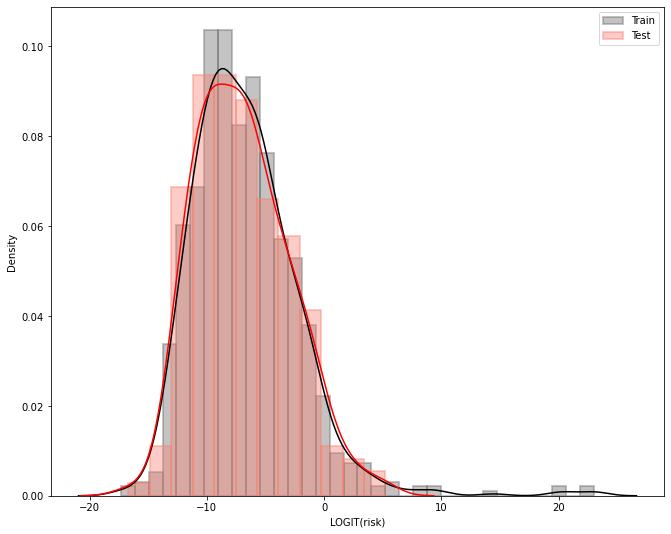

In [28]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)

plt.figure()
ind = np.arange(len(y)) 
plt.scatter(ind,y, color="b",label="Training")
ind = np.arange(len(y_Test))
plt.scatter(ind,y_Test, color="r",label="Test")
plt.title("Unseen")
plt.xlabel("Actual")
plt.ylabel("pred")
plt.legend(loc="best")
plt.show()
plt.figure(figsize=(11, 9))
sns.distplot(y,hist=True,color='k',hist_kws=dict(color='dimgray',edgecolor="dimgray", linewidth=2),label='Train')
sns.distplot(y_Test,hist=True,color='r',hist_kws=dict(color='salmon',edgecolor="salmon", linewidth=2),label='Test')
plt.legend(loc="best",frameon=True)
plt.grid( False)

In [28]:
state=12

In [29]:
Data=pd.read_csv('1000_maxstrains_upt_logitrisk.csv',sep=';')

In [30]:
X = Data[ Data.columns[1:23]]
y = Data['LOGIT(risk)']
y=expit(y)

In [31]:
modo=GaussianProcessRegressor(kernel=RationalQuadratic(alpha=1, length_scale=1) ** 2 + WhiteKernel(noise_level=5),
                         n_restarts_optimizer=4, normalize_y=True,
                         random_state=0,alpha=2)
mod = TransformedTargetRegressor(regressor=modo,func=logit,inverse_func=expit)

# mod = TransformedTargetRegressor(regressor=modo,func=np.log,inverse_func=np.exp)
# mod = TransformedTargetRegressor(regressor=modo,transformer=QuantileTransformer(output_distribution='normal'))

In [32]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [33]:
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=state)


In [34]:
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error',train_sizes=[50,150,250,500,750,895])

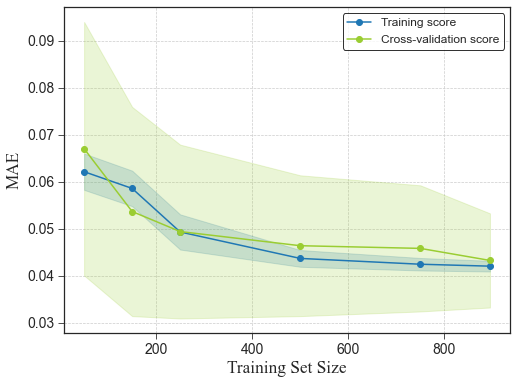

In [35]:
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)


plt.figure(figsize=(8, 6))
plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
plt.plot(train_size,train_mean, 'o-', color="C0",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="yellowgreen",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color="C0", alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color="yellowgreen", alpha=0.2)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size", fontsize='xx-large',**csfont)
plt.ylabel("MAE", fontsize='xx-large',**csfont)
leg = plt.legend(frameon=True,loc='best',prop={'size': 12})
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(linestyle = '--', linewidth = 0.7)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.savefig('gprLC', bbox_inches="tight")
plt.show()
# csfont = {'fontname':'Times New Roman'}    
# plt.figure(figsize=(10, 6))
# plt.style.use('seaborn-whitegrid')
# # plt.subplots(1)
# plt.plot(train_size,train_mean, 'o-', color='gray',label="Training score",markeredgecolor='gray')
# plt.plot(train_size, test_mean, 'o-', color='k',label="Cross-validation score",markeredgecolor='k')
# plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, color='gray',alpha=0.1)
# plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, color='k', alpha=0.1)
# plt.title("Learning Curve for {}".format(str(mod).split('(')[0]),**csfont)
# plt.xlabel("Training Set Size",**csfont)
# plt.ylabel("RMS Error",**csfont)
# plt.rcParams["font.family"] = "Times New Roman"
# plt.legend(loc="best",frameon=True)
# plt.show()

In [36]:
pd.DataFrame(test_mean)

,0
0,0.067038
1,0.053665
2,0.049396
3,0.046384
4,0.045815
5,0.043250


In [8]:
X = X.to_numpy()
y = y.to_numpy()

In [9]:
y_Test=y_Test.to_numpy()

In [10]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

Root Mean squared error: 1.052666

Root Mean squared error: 1.520184

Root Mean squared error: 1.542033

Root Mean squared error: 2.058585

Root Mean squared error: 1.446464

Root Mean squared error: 1.913970

Root Mean squared error: 2.385134

Root Mean squared error: 1.787604

Root Mean squared error: 1.474392

Root Mean squared error: 1.687998



In [12]:
from scipy.special import logit, expit

In [13]:
ytestunk=HBM_Train.predict(X_Test)
ytestunk=expit(ytestunk)
y_Test=expit(y_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    3.052338
dtype: float64  error mean --->0    0.031611
Name: mean, dtype: float64  error std --->0    0.096487
Name: std, dtype: float64


In [12]:
# tst=expit(ytestunk)
# tst_act=expit(y_Test)
# err=np.zeros(len(tst))
# for u in range (0,len(tst)):
#     err[u]=np.sqrt((tst_act[u]-tst[u])**2)
# a=pd.DataFrame(err).describe()
# cov_r=a.loc['std']/abs(a.loc['mean'])
# print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

# train score

In [14]:
ytr=HBM_Train.predict(X)
ytr=expit(ytr)
y=expit(y)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    3.894975
dtype: float64  error mean --->0    0.014242
Name: mean, dtype: float64  error std --->0    0.055473
Name: std, dtype: float64


In [15]:
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=y[u]-ytr[u]
pd.DataFrame(err).describe()

,0
count,7.960000e+02
mean,1.320633e-03
std,5.725953e-02
min,-4.223734e-01
25%,-1.430992e-04
50%,-3.018566e-07
75%,4.621291e-04
max,8.346301e-01


In [16]:
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=y_Test[u]-ytestunk[u]
pd.DataFrame(err).describe()

,0
count,199.000000
mean,-0.011335
std,0.100920
min,-0.721231
25%,-0.000894
50%,-0.000014
75%,0.000104
max,0.399610


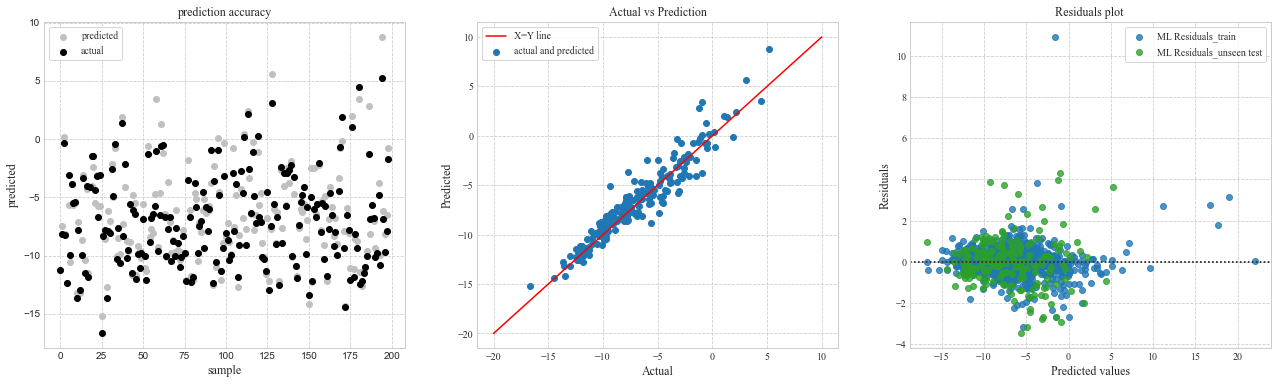

In [15]:
plt.figure(figsize=(22, 6))
plt.style.use('seaborn-whitegrid')
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,color='silver',label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual',color='k')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted',color='C0')
plt.plot([-20,10],[-20,10],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)

plt.subplot(1,3,3)
a=sns.residplot(y=(y), x=(ytr),label='ML Residuals_train',color='C0')
r=sns.residplot(y=(ytestunk), x=(y_Test),label='ML Residuals_unseen test',color='C2')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend(loc="best",frameon=True)


plt.show()